# Data512 A  - Final Project

## Analysis of Restaurant Inspection Scores in Austin and New York

The Austin/Travis County Health and Human Services Department conducts the permitting and inspection of more than 4,000 food establishments in Austin, several local municipalities and rural Travis County. Food establishments should be inspected twice a year. If unable to be inspected at this frequency, then inspections are prioritized by risk. The establishments include a wide variety of food industries, such as restaurants, delicatessens, school cafeterias, grocery stores, retail meat markets, bakeries and bars. If no violations are found, a score of 100 is achieved. If more than 30 points are lost, a re-inspection is required and corrections must be made to bring the score above 70, in accordance with the Texas Food Establishment Rules. If subsequent inspections score below 70, compliance actions are taken.

Nowadays, people eat out more often than they used to. Restaurants that serve the same cuisine strive to make their food the best so as to attract more customers. Sometimes, in an effort to make the food look and taste good, the cleanliness is often neglected. This lack of proper kitchen hygiene often leads to low inspection scores in the case of a surprise inspection. Low scores mean that the restaurant loses most of its customer base and has to devote additional resources to get back to their original popularity. This wastes a lot of time and money for the people involved. My plan is to provide people in Austin and New York a good list of places to eat that scored above 80 in the inspection.



In [158]:
import pandas as pd
import statsmodels.api as sm
from pandas import crosstab
import seaborn as sb
import matplotlib.pyplot as plt

In [159]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

To ensure that the New York inspection scores file can be imported to github, I split it into 3 text files and then converted them to csv for ease of use in python. The data file is 145mb and github accepts a maximum of 60 mb data into their repositories. 

### Importing all files 

In [160]:
data1 = pd.read_csv('xaa.txt', sep=",")
data2 = pd.read_csv('xab.txt', sep=",")
data3 = pd.read_csv('xac.txt', sep=",")

I split the files in shell script and uploaded them on github and import them as csv files after converting the split files into text files. 

In [161]:
data = [data1,data2,data3]
data = pd.concat(data)

In [162]:
data_austin = pd.read_csv('Restaurant_Inspection_Scores.csv')

## Austin Inspection data

### Data exploration

Before starting my analysis, since this is a small file, I wanted to see what columns it has and how useful they would be in my analysis. 

In [163]:
data_austin.head(5)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,Tortilleria Rio Grande,78753,08/19/2015,81,"900 E BRAKER LN Unit 160\nAUSTIN, TX 78753\n(3...",10239712,Routine Inspection
1,Two Steps Ahead Learning Center,78723,04/02/2015,100,"3028 ROGGE LN\nAUSTIN, TX 78723\n(30.303188, -...",10871599,Routine Inspection
2,WL - Eanes Elementary,78746,02/09/2015,100,"4101 BEE CAVES RD\nWEST LAKE HILLS, TX 78746\n...",10002740,Routine Inspection
3,Vinaigrette TX LLC,78704,03/29/2017,83,"2201 COLLEGE AVE\nAUSTIN, TX 78704\n(30.241425...",11463881,Routine Inspection
4,Torchy's Tacos,78731,12/10/2015,100,"4211 SPICEWOOD SPRINGS RD\nAUSTIN, TX 78731\n(...",10382525,Routine Inspection


As is evident from the first 5 rows, its not only restaurants that have been inspected. There are scores for schools and every other place which has a food center. Since there is no way to separate the restaurants from the other food places, I will work on the whole dataset.

In [164]:
data_austin = data_austin.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0db34828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0fcc8c50>]], dtype=object)

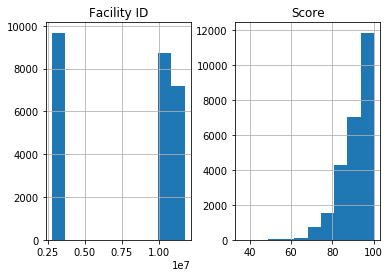

In [165]:
data_austin.hist()

In [166]:
data_austin[data_austin['Process Description'] == '2nd Follow Up to 50 - 69']

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
2873,Crawfish Shack and Oyster Bar,78728,11/05/2015,78,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,2nd Follow Up to 50 - 69
4701,888 Vietnamese,78741,08/24/2015,84,"2400 E OLTORF ST Unit 1-A\nAUSTIN, TX 78741\n(...",2802966,2nd Follow Up to 50 - 69
11154,Curras Grill,78704,08/03/2016,89,"614 E OLTORF ST\nAUSTIN, TX 78704\n(30.236826,...",2800774,2nd Follow Up to 50 - 69
14784,Hunan Lion Restaurant,78704,02/04/2015,89,"4006 S LAMAR BLVD SB Unit 1000\nAUSTIN, TX 787...",10988489,2nd Follow Up to 50 - 69
15121,Ken's Donuts,78705,12/22/2015,83,"2820 GUADALUPE ST\nAUSTIN, TX 78705\n(30.29504...",2800639,2nd Follow Up to 50 - 69
17477,Mongolian Hot Pot,78705,08/10/2017,74,"2400 SETON AVE\nAUSTIN, TX 78705\n(30.288035, ...",11490862,2nd Follow Up to 50 - 69


In [167]:
data_austin[data_austin['Restaurant Name'] == 'Crawfish Shack and Oyster Bar']

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
2863,Crawfish Shack and Oyster Bar,78728,01/04/2016,80,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2864,Crawfish Shack and Oyster Bar,78728,01/09/2017,84,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2865,Crawfish Shack and Oyster Bar,78728,03/26/2015,83,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2866,Crawfish Shack and Oyster Bar,78728,04/13/2017,75,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2867,Crawfish Shack and Oyster Bar,78728,06/16/2016,45,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2868,Crawfish Shack and Oyster Bar,78728,07/20/2017,85,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2869,Crawfish Shack and Oyster Bar,78728,07/22/2016,74,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2870,Crawfish Shack and Oyster Bar,78728,10/03/2016,71,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2871,Crawfish Shack and Oyster Bar,78728,10/08/2015,61,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,Routine Inspection
2872,Crawfish Shack and Oyster Bar,78728,10/26/2015,64,"2013 W WELLS BRANCH PKWY\nAUSTIN, TX 78728\n",10037846,1st Follow Up to Routine of 50 - 69


In [168]:
data_austin['Score'].describe()

count    25562.000000
mean        91.276465
std          7.508453
min         36.000000
25%         87.000000
50%         93.000000
75%         97.000000
max        100.000000
Name: Score, dtype: float64

In [169]:
result = data_austin.sort_values(by = ['Score'],ascending = True)

Number of restaurants grouped according to their inspection scores.

In [170]:
result.groupby(['Score'])['Restaurant Name'].count()

Score
36        1
45        2
50        4
51        1
53        5
54        5
55        3
56        6
57        6
58        4
59       10
60       10
61       11
62       10
63       20
64       13
65       16
66       12
67        8
68       14
69        8
70      170
71      123
72      149
73      131
74      154
75      166
76      197
77      222
78      294
79      300
80      380
81      423
82      484
83      512
84      615
85      698
86      726
87      797
88      853
89     1006
90     1286
91     1084
92     1232
93     1544
94     1548
95     1235
96     1464
97     2306
98      937
99      810
100    3547
Name: Restaurant Name, dtype: int64

Surprisingly, the highest number of restaurants had a 100 in their scores and only 3 had scores below 50. This tells us that either the scoring done in Austin is way too high or that there are excellent restaurants. I doubt its more of the latter.

In [171]:
best_rest = result[result['Score'] == 100]

In [172]:
best_rest['Restaurant Name'].drop_duplicates()


16472           MN - Manor High School Cafeteria
24165                         TCBY Frozen Yogurt
16361    LW - Hills Country Club-World of Tennis
1846                            Walgreens #07673
3607                           La Bodega Gourmet
13187                         Govalle Elementary
24163                          Subway Sandwiches
13531                Hawthorne Montessori School
13188                     Great Habits Gift Shop
1838                WL - Randall's Grocery #2477
529                                      U PAK M
1847                            Whataburger #321
1961                         Westgate Lane (Bar)
3540                  LW - Randall's #1779 -Deli
429                                 Tokyo Garden
25457                    Target (Produce) T-1797
3619                                La Madeleine
4670                             Zaytouna Lounge
8755                  Chipotle Mexican Grill #56
3603                                 LW- HEB 714
25551               

Names of places which scored a 100 

There are repeated names because multiple inspections had occured at different times.

In [173]:
data_austin.columns= ['Restaurant_name','Zip_code','Inspection_date','Score','Address','Facility_id','Process_description']

I want to get a list of bad restaurants that lie in areas where there are good quality restaurants and find out why that is the case.

In [184]:
best_rest.head(5)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
16472,MN - Manor High School Cafeteria,78653,03/28/2017,100,"12700 GREGG MANOR RD\nMANOR, TX 78653\n(30.353...",2801408,Routine Inspection
24165,TCBY Frozen Yogurt,78739,03/24/2017,100,"5701 W SLAUGHTER LN Bunit 100\nAUSTIN, TX 7873...",10805254,Routine Inspection
16361,LW - Hills Country Club-World of Tennis,78738,06/29/2016,100,"1 WORLD OF TENNIS SQ\nLAKEWAY, TX 78738\n(30.3...",10002985,Routine Inspection
1846,Walgreens #07673,78717,01/20/2015,100,"10600 W PARMER LN\nAUSTIN, TX 78717\n(30.49866...",2803968,Routine Inspection
3607,La Bodega Gourmet,78738,11/03/2015,100,"11500 FM 2244 RD\nBEE CAVE, TX 78738\n",11313992,Routine Inspection


In [185]:
rest = [data_austin[data_austin['Zip_code'] == best_rest['Zip Code'].values.tolist()[i]] for i in range(0,len(best_rest['Zip Code']))]

In [186]:
name = []
score=[]
for i in range(0,len(rest)):
    if(rest[i]['Score'].describe()['min'] < 70):
        name.append(rest[i].loc[rest[i]['Score'] == rest[i]['Score'].describe()['min'],'Restaurant_name'])
        score.append(rest[i]['Score'].describe()['min'])

Names of bad restaurants in good neighborhoods. There are 3000 such restaurants spread across several neighborhoods. Some are mentioned below.

In [187]:
name[0:5]

[7383    Blake Manor Food Mart
 Name: Restaurant_name, dtype: object, 16185    La Catedral Del Marisco
 Name: Restaurant_name, dtype: object, 20824    Poco Loco Supermercado
 Name: Restaurant_name, dtype: object, 17451    Mikado Ryotei
 Name: Restaurant_name, dtype: object, 7383    Blake Manor Food Mart
 Name: Restaurant_name, dtype: object]

In [260]:
data_austin.describe()

,Score,Facility_id,Date,pd
count,25562.000000,2.556200e+04,2.556200e+04,25562.000000
mean,91.276465,7.735905e+06,1.460752e+09,0.006650
std,7.508453,3.869482e+06,2.727289e+07,0.086865
min,36.000000,2.800004e+06,1.413184e+09,0.000000
25%,87.000000,2.802304e+06,1.436771e+09,0.000000
50%,93.000000,1.022271e+07,1.461222e+09,0.000000
75%,97.000000,1.092674e+07,1.485158e+09,0.000000
max,100.000000,1.174516e+07,1.506064e+09,3.000000


According to the statistics given by the describe() function, the average rating given is 91. To filter out the bad restaurants, I have seen all the data which has score less than 91.

In [188]:
bad_rest = data_austin[data_austin['Score'] < 91]

In [189]:
len(bad_rest['Zip_code'].drop_duplicates())

56

These are the zipcodes that have restaurants with a bad rating.

In [190]:
bad_rest['Zip_code'].drop_duplicates()

0                              78753
3                              78704
5                              78745
9                              78759
12                             78758
14                             78701
19                             78719
28                             78757
31                             78731
34                             78741
40                             78746
52                             78729
60                             78705
84                             78723
85                             78751
128                            78752
130                            78652
141                            78750
142                            78717
163                            78660
218                            78744
226                            78734
252                            78613
259                            78732
344                            78727
347                            78749
348                            78748
3

## Using Lasso to find coefficients for each column

In [191]:
import re
import numpy
from datetime import datetime

In [192]:
x = []
for i in range(0,len(data_austin['Inspection_date'])):
    match = re.search(r'\d{2}/\d{2}/\d{4}', data_austin['Inspection_date'][i])
    date = datetime.strptime(match.group(), '%m/%d/%Y').date()
    x.append(int(date.strftime("%s")))


In [193]:
data_austin['Date'] = x

In [194]:
unique = data_austin['Process_description'].drop_duplicates()

In [195]:
str1 = unique[0]
unique

0                            Routine Inspection
77          1st Follow Up to Routine of 50 - 69
2873                   2nd Follow Up to 50 - 69
14774    1st Follow Up to Routine of 49 or less
Name: Process_description, dtype: object

In [196]:
str2 = unique[77]
str3 = unique[2873]
str4 = unique[14774]

In [197]:
y = []
for i in range(0,len(data_austin['Process_description'])):
    if(data_austin['Process_description'][i] == str1):
        y.append(0)
    elif(data_austin['Process_description'][i] == str2):
        y.append(1)
    elif(data_austin['Process_description'][i] == str3):
        y.append(2)
    else:
        y.append(3)

In [198]:
data_austin['pd'] = y

In [199]:
data=data_austin[['Zip_code','Date','pd','Score','Restaurant_name']]

In [200]:
score = data['Score']

In [201]:
del data['Score']

In [202]:
sc=[]
for i in range(0,len(score)):
    if(score[i] > 91):
        sc.append(1)
    else:
        sc.append(0)
            

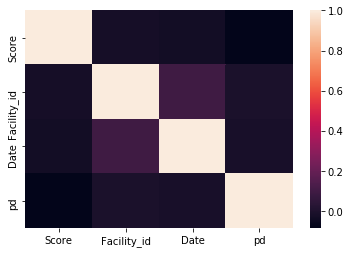

In [203]:
%matplotlib inline
sb.heatmap(data_austin.corr())

In [204]:
model = LassoCV()
#model.fit(data[['Zip_code','Date','pd']],score)

On running this, I found out that not all the zipcode values were integers. There are some zipcode values that have part of the address as well. No doubt, a mistake made by the data gatherers. To rectify this mistake, I find all the indices where there are strings in place of integers and correct them. Thankfully, it is only a handful.

In [205]:
indices = []
for i in range(0,len(data['Zip_code'])):

    if(data['Zip_code'][i].isdigit()):
        x = int(data['Zip_code'][i])
    else:
        indices.append(i)

In [206]:
for i in range(0,len(indices)):
    data['Zip_code'][indices[i]] = data['Zip_code'][indices[i]][-5:]

/Users/jayeshparekh/Downloads/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jayeshparekh/Downloads/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Now I can convert my string values to integers and run the Lasso. But before I do that, Todd suggested I consider zipcode as a categorical variable and then plot the values against the score to see what kind of graph is generated.

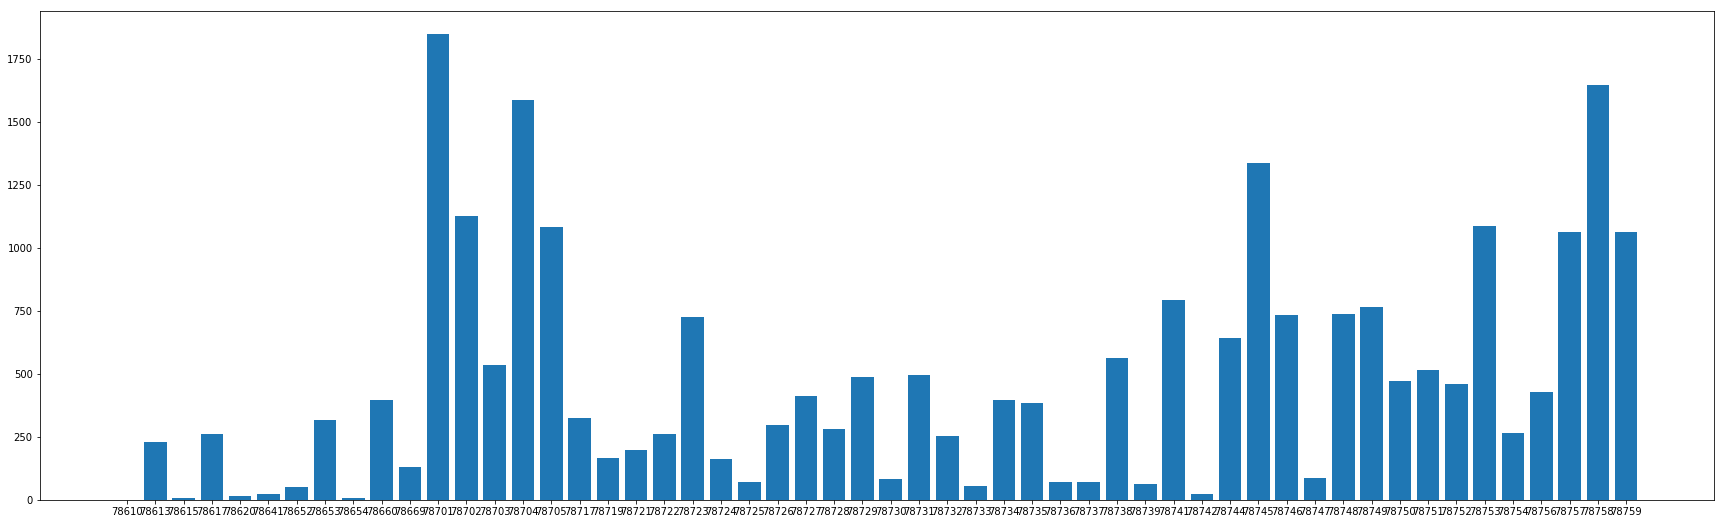

In [239]:
count_df = data.groupby(['Zip_code'])['Restaurant_name'].count()
count_df = count_df.to_frame()
count_df = count_df.reset_index()
plt.bar(count_df['Zip_code'],count_df['Restaurant_name']);


The line plt.xticks

In [240]:
data['Zip_code'] = [int(x) for x in data['Zip_code']]

/Users/jayeshparekh/Downloads/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
count_df = data.groupby(['Zip_code'])['Restaurant_name'].count()
count_df = count_df.to_frame()
count_df = count_df.reset_index()

<Container object of 54 artists>

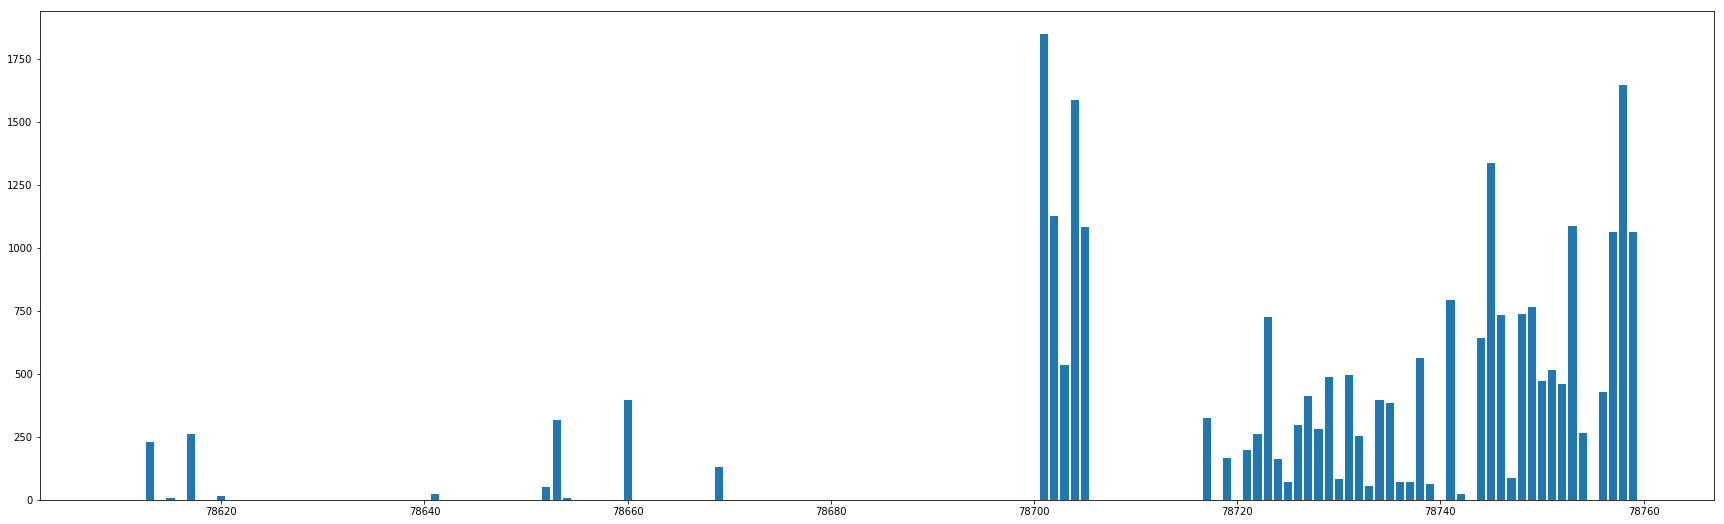

In [242]:
plt.bar(count_df['Zip_code'],count_df['Restaurant_name'])

In [243]:
model = sm.Logit(sc,data[['Zip_code','Date','pd']])

In [244]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.679752
         Iterations 6


In [245]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                25562
Model:                          Logit   Df Residuals:                    25559
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                0.004356
Time:                        19:54:15   Log-Likelihood:                -17376.
converged:                       True   LL-Null:                       -17452.
                                        LLR p-value:                 9.626e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Zip_code    5.433e-05   8.63e-06      6.294      0.000    3.74e-05    7.12e-05
Date       -2.722e-09   4.65e-10     -5.853      0.000   -3.63e-09   -1.81e-09
pd            -1.9129      0.213     -8.966      0.000      -2.331      -1.495
==============================================================================
"""

The coefficients of zip_code and date are too small to be able to have any effect on score. The negative coefficient of process description indicates that more the number of inspections, the score would be less the first time around.

Normally, I should have more parameters to compare as 3 parameters is not a good number for Lasso. I had tried using TfidVectorizer to convert string values for use in regression but I wasn't very successful. 

## New York inspection scores

### Data Exploration


In [251]:
data = [data1,data2,data3]
data = pd.concat(data)

In [252]:
data.shape

(397544, 18)

In [258]:
data.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50017257,PICK & PAY GYRO & PIZZA,MANHATTAN,30,LEXINGTON AVE,10010.0,2123878200,Pizza,08/30/2016,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,15.0,NaN,NaN,11/16/2017,Cycle Inspection / Initial Inspection
1,40393905,GRANDSTAND TAVERN,QUEENS,8535,GRAND AVENUE,11373.0,7184789633,Irish,11/12/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,11/12/2015,11/16/2017,Cycle Inspection / Initial Inspection
2,41093742,STONE CREEK,MANHATTAN,140,EAST 27 STREET,10016.0,2125321037,American,01/28/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/16/2017,Administrative Miscellaneous / Initial Inspection
3,41271436,MATSUNOYA,MANHATTAN,131,EAST 45 STREET,10017.0,6466928143,Japanese,09/08/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,NaN,NaN,11/16/2017,Pre-permit (Non-operational) / Initial Inspection
4,50003403,SILK ROAD CAFE,MANHATTAN,30,MOTT ST,10013.0,6462399935,CafÃ©/Coffee/Tea,11/24/2014,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/16/2017,Administrative Miscellaneous / Initial Inspection


This is quite large compared to the austin data above and it has more columns too. For this data, I want to see if I can use Lasso, so I see which columns have integer or floating type values

In [257]:
data._get_numeric_data().head(5)

,CAMIS,ZIPCODE,SCORE
0,50017257,10010.0,15.0
1,40393905,11373.0,13.0
2,41093742,10016.0,NaN
3,41271436,10017.0,5.0
4,50003403,10013.0,NaN


I see that out of 18 only 3 columns have integer values

Ignoring the statistics of the Ids and the zipcodes, we see that the lowest possible score given was -2. Considering that the highest score was 151, we can only guess what kind of situation compelled the inspector to give them a negative rating. To see the restaurant with the negative rating:

In [ ]:
data[data['SCORE'] == -2]

In [ ]:
data.select_dtypes(include=['float']).head(1)

In [ ]:
data.select_dtypes(include=['int']).head(1)

Only 3 columns have integer/float values, which is not a good base for Lasso regression. To make the regression results fairer, I have dropped all the nan values from the dataframe.

In [ ]:
data = data.dropna()

In [ ]:
data.columns = ['camis','dba','boro','building','street','zipcode','phone','cuisine_description','inspection_date','action','violation_code','violation_description','critical_flag','score','grade','grade_date','record_date','inspection_type']

In [ ]:
from pandas import DatetimeIndex
data['month'] = DatetimeIndex(data['record_date']).month


In [ ]:
count_df = data.groupby(['boro'])['dba'].count()
count_df = count_df.to_frame()
count_df = count_df.reset_index()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(count_df['boro'],count_df['dba'])


How many Restaurants in each cuisine

In [ ]:
count_df = data.groupby(['cuisine_description'])['dba'].count()
count_df = count_df.to_frame()
count_df = count_df.reset_index()

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib qt
plt.bar(count_df['cuisine_description'],count_df['dba'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

It is not easy to identify which cuisine has the most restaurants so we can look at the crosstab of cuisine vs restaurant names

In [ ]:
count_df.sort_values(by='dba',ascending=False).head(5)

The highest number of restaurants in NY serve American cuisine and since Chinatown is huge, I am not surprised that Chinese has the second highest number of restaurants.


Finding the highest and lowest score given

In [ ]:
data['score'].max()

In [ ]:
data['score'].min()

In [ ]:
mean_sc = data['score'].mean()

I found the mean score to compare the other scores to to set a binary column for score to run a logistic regression.

In [ ]:
mean_sc = float(mean_sc)

In [ ]:
mean_sc

I have defined a bad restaurant has one which has a below average score. I want to see how many bad restaurants there are in each neighborhood

In [ ]:
bad_df = data[data['score'] < mean_sc]

In [ ]:
bad_df.groupby('boro')['dba'].count()

The dataset is too big to consider all the rows so I decided to take a sample of 50,000 rows

In [ ]:
sc = []
for i in range(0,50000):
    if(data['score'].values.tolist()[i] > mean_sc):
        sc.append(1)
    else:
        sc.append(0)

In [ ]:
data = data.head(50000)

In [ ]:
data['sc'] = sc

In [ ]:
ml_data = data[['cuisine_description', 'boro', 'month','sc']]

In [ ]:
ml_data.to_csv('lr_data.csv')

I wanted to try running a logistic regression on this data and R is better at handling categorical variables than Python is, so I ran my logistic regression in R